In [2]:
import numpy as np
import cv2 as cv
#from cv2 import imshow as cv2_imshow
#from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import random

import matplotlib.pyplot as plt

def cv2_imshow(img):
    """ Альтернатива cv2_imshow для Jupyter Notebook. """
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")  
    plt.show()

## Intro

Linear algebra is fundamental in many fields, particularly in classical computer vision. This is because every image can be represented as a matrix, and matrices represent linear transformations. As a result, we can apply known linear transformations to images!

This lab provides an overview of linear transformations, their proofs, and how to apply them to images to visualize their effects.





## Rules
1. Submit this task as a Jupyter Notebook (.ipynb file).

2. Please use cv2 standard methods for reading and resizing the images, and matplotlib or cv2 imshow function for displaying it.

3. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and **make sure that the names of all team members are listed in the notebook**. Teammates not mentioned in the notebook will not be graded for this lab.  

4. Provide a **work breakdown** structure estimating the efforts of each team member. Please provide it at the top of your notebook.  

5. Your final grade will be a product of grade for the coding and explanatory part and coefficient for the oral defense (will be announced later). Please note that your final mark for this assignment will consist of three components:
  *   Coding part
  *   Explanations
  *   Oral defense (to be scheduled later)

  Make sure you include detailed theoretical explanations where necessary.

6. **Important**: during the implementation, you are welcomed to use `cv2` methods, but you must also implement the transformation matrices yourself (except image **reading**, **resizing** and **displaying**). Finally, as a successful result, you can demonstrate that the outputs of both approaches coincide!

7. The final deadline is **February 24 2025, 22:00**. If you submit your assignment after this time and date, it will not be graded.




#### Work breakdown (example):

Name, surname 1: ....\
Name, surname 2: ....\
...


## OpenCV library

In this laboratory work, we will use `OpenCV` to process images. This is a popular library used for working with images and videos. It provides many tools for tasks like image processing, object detection, and analyzing video. 

The main thing that you need to know is **Coordinate System**. In `OpenCV`, the coordinate system starts at the top-left corner of the image:

- X-axis increases from left to right.
- Y-axis increases from top to bottom.

So, the point $(0,0)$ is at the top-left of the image, and the point at the bottom-right is $(W-1, H-1)$, where $H$ - height, $W$ - width.

<br>

Some basic information about its methods with examples you can find here: https://www.geeksforgeeks.org/opencv-python-tutorial/#2-working-with-images

## 1.

Recall that a linear transformation is a mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ such that
$\forall c_1, c_2 \in \mathbb{R}, \mathbf{u}_1, \mathbf{u}_2 \in \mathbb{R}^n$  
$T(c_1 \mathbf{u}_1 + c_2 \mathbf{u}_2) = c_1T(\mathbf{u}_1) + c_2T(\mathbf{u}_2)$.  

In this lab you will study some of the common transformations in $\mathbb{R}^2$, derive their general matrix form, explain what a resulting image will look like and apply transformations to the vectors and pictures.

Each linear transformation can be represented as a matrix. In case of an image linear transformation is applied to a pixel position on xy-plane, transforming its coordinates $(x, y)$ to $(x', y')$ but retaining the color. However, the image is usually represented as an array of pixels, thus having the dimension (image height, image width, 3) if the color is represented in RGB system. You can use *warpAffine()* function from cv2 to perform transformations on the image, or you can implement a function that manipulates each pixel's position given an array of pixels and calculate the transformation matrix on your own.

### What is a transformation matrix?

*(Your answer goes here)*

### 1.1 Image preparation

First, load image 1, resize it to a more convenient form, and examine its representation.

The shape of the image is (500, 500, 3)


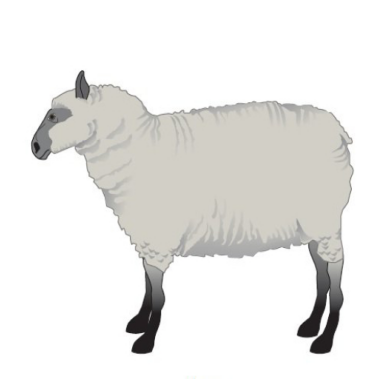

In [3]:
# Load images

##### YOUR CODE STARTS #####

img1_path = './sheep.png'
image = cv.imread(img1_path)
resized = cv.resize(image, (500, 500))

print(f"The shape of the image is {resized.shape}") 
cv2_imshow(resized)

##### YOUR CODE ENDS #####

 What is this image's shape? What do the values mean?

*(Your answer goes here)*

(500, 500, 3) means a 500 by 500 matrix, the size of which indicates the number of pixels vertically (500) and horizontally (500). Each element of this matrix contains a vector of size three and specifies the color for each pixel of the image according to the RGB format.


### 1.2 Scaling matrix

Scaling is a tranformation that enlarges or diminishes objects by a factor. For scaling in 2D space a factor can be represented as a vector $(x_s, y_s)$ where $x_s$ and $y_s$ are scaling factors for each respective axis (those factors don't have to be equal). On the picture below, V' represents vector V scaled by a factor (0.5, 1) and V'' - by (0.5, 0.5).
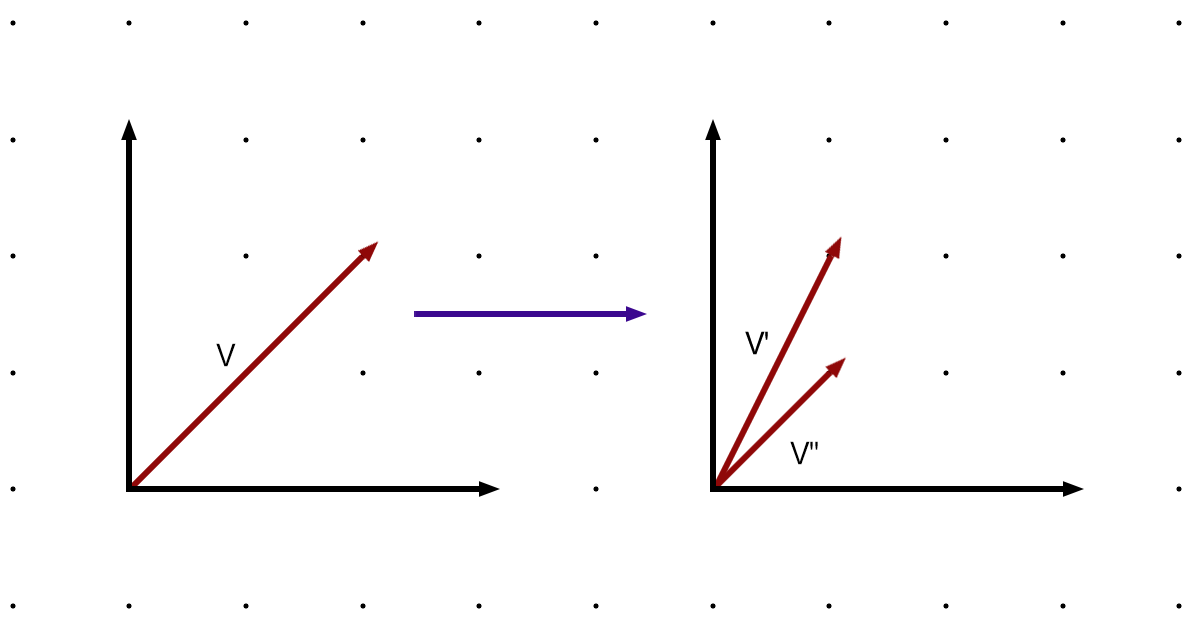

In this part, you should derive a general form for a scaling matrix and apply scaling by a factor of (1, 0.5) to the vector. First, explain how you derive the scaling matrix:

*(Your answer goes here)*

${\bf v} = (v_x, v_y) \rightarrow {\bf v}'(k_x\cdot v_x, k_y\cdot v_y)$

$$
\begin{pmatrix} 
k_x\cdot v_x \\ 
k_y\cdot v_y   
\end{pmatrix}
=
\begin{pmatrix} 
a_{11} & a_{12} \\ 
a_{21} & a_{22} \\  
\end{pmatrix}
\begin{pmatrix} 
v_x \\ 
v_y  
\end{pmatrix}
$$

$k_x \cdot x = a_{11}x + a_{12}y $. Therefore $a_{11} = k_x$, $a_{12} = 0$

$ k_y \cdot y = a_{21}x + a_{22}y $. Therefore $a_{21} = 0$, $a_{22} = k_y$

So:

$$
A = \begin{pmatrix} 
k_x & 0 \\ 
0 & k_y \\  
\end{pmatrix}
$$

In [4]:
##### YOUR CODE STARTS #####
def get_scaling_matrix(scale_factor_x, scale_factor_y):
    return np.array([[scale_factor_x, 0],[0, scale_factor_y]])

M2 = get_scaling_matrix(1,0.5)

##### YOUR CODE ENDS #####
print("Scaling matrix is")
print(M2)


Scaling matrix is
[[1.  0. ]
 [0.  0.5]]


Second, apply scaling by (1, 0.5) to the vector.

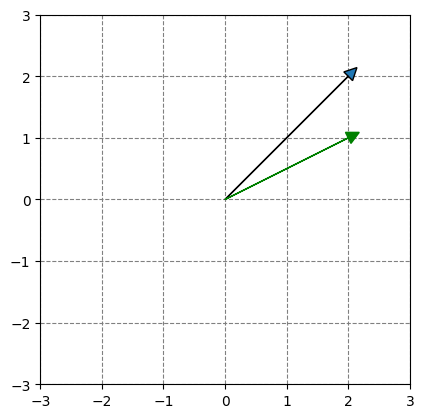

In [5]:
# Apply scaling to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([2, 2])
B2 = M2@B1
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Now, apply scaling by some factor to the image (scaled by a factor of (1, 0.5) before) to restore the **sheep.png**:

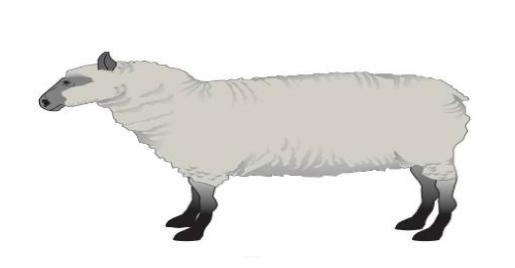

In [6]:
scaled_img = cv.imread("./scaled_sheep.png")
cv2_imshow(scaled_img)

250 250


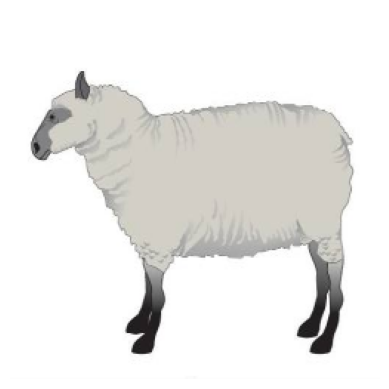

In [7]:
##### YOUR CODE STARTS #####
scale_factor_x = 0.5 
scale_factor_y = 1
new_width = int(scaled_img.shape[1] * scale_factor_x)
new_height = int(scaled_img.shape[0] * scale_factor_y)

print(new_width, new_height)
restored_img = cv.resize(scaled_img, (new_width, new_height))

##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

### 1.3 Shear matrix

Horizontal shearing moves each point in a fixed direction by distance proportional to y-coordinate of the point. Shear map changes angles and lengths of line segments.

In this part, you need to build a shearing matrix, find a transformation matrix that moves the point $(x, y)$ to $(x+1.5y, y)$, and apply it to the vector. First, explain how do you build a matrix that corresponds to a shearing transformation:

*(Your answer goes here)*

${\bf v} = (x, y) \rightarrow {\bf v}'(x + ky, y)$

$$
\begin{pmatrix} 
x + ky \\ 
y   
\end{pmatrix}
=
\begin{pmatrix} 
a_{11} & a_{12} \\ 
a_{21} & a_{22} \\  
\end{pmatrix}
\begin{pmatrix} 
x \\ 
y  
\end{pmatrix}
$$

$x + ky = a_{11}x + a_{12}y $. Therefore $a_{11} = 1$, $a_{12} = k$

$ y = a_{21}x + a_{22}y $. Therefore $a_{21} = 0$, $a_{22} = 1$

So:
$$
A = \begin{pmatrix} 
1 & k \\ 
0 & 1 \\  
\end{pmatrix}
$$

Second, implement a function for constructing such a matrix:

In [8]:
##### YOUR CODE STARTS #####
def get_horizontal_shear_matrix(factor):
    return np.array([[1, factor],[0, 1]])

M3 = get_horizontal_shear_matrix(1.5)
##### YOUR CODE ENDS #####
print("Shearing matrix is")
print(M3)

Shearing matrix is
[[1.  1.5]
 [0.  1. ]]


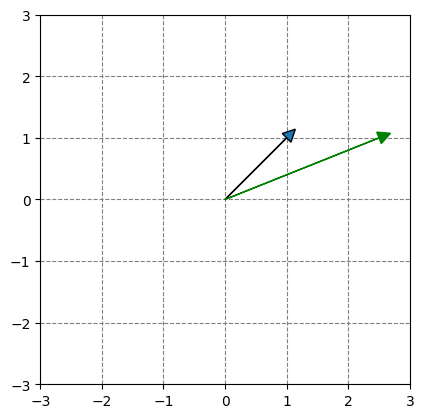

In [9]:
# Apply shearing to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([1, 1])
B2 = M3@B1

##### YOUR CODE ENDS #####
ax = plt.axes()
ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply this shearing transformation to the image (transformed with vertical shearing) to restore **sheep.png**.

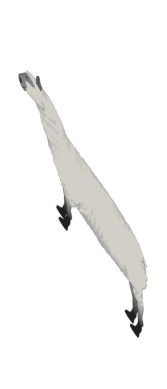

In [10]:
sheared_img = cv.imread("./sheared_sheep.png")
cv2_imshow(sheared_img)

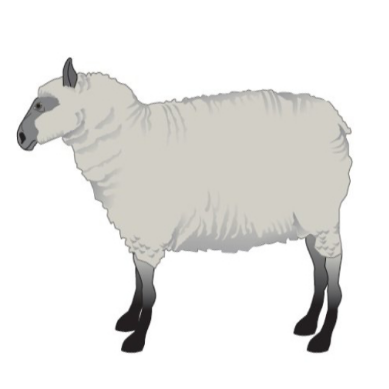

In [11]:
##### YOUR CODE STARTS #####
factor = 1.5

M = np.array([[1, 0],[factor, 1]], dtype=np.float32)
M_inv = np.linalg.inv(M)
M_inv_ext = np.pad(M_inv, ((0, 0), (0, 1)), mode='constant', constant_values=0)
cols_0, rows_0 = sheared_img.shape[1], sheared_img.shape[0]

new_cols = int(cols_0 + M_inv[1, 0] * rows_0)
new_rows = rows_0
restored_img = cv.warpAffine(sheared_img, M_inv_ext, (new_cols, new_rows), borderMode=cv.BORDER_REPLICATE)[20:500, 20:1250]

##### YOUR CODE ENDS #####

cv2_imshow(restored_img)



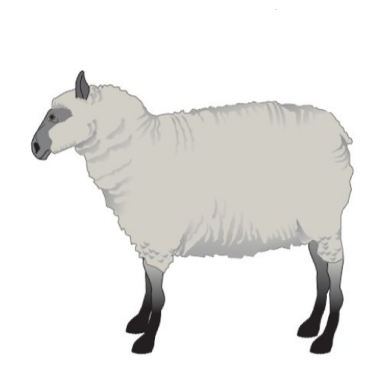

In [15]:
#Second manual implementation:

def restore_sheared_image_manual(sheared_img, shear_factor):
    h, w, c = sheared_img.shape
    new_w = w
    new_h = int(h - abs(shear_factor) * w)
    restored_img = np.zeros((new_h, new_w, c), dtype=np.uint8)

    for y in range(new_h):
        for x in range(new_w):
            old_y = int(y + shear_factor * x)
            if 0 <= old_y < h:
                restored_img[y, x] = sheared_img[old_y, x]
    return restored_img

sheared_img_path = "./sheared_sheep.png"
sheared_img = cv.imread(sheared_img_path)
restored_img_manual = restore_sheared_image_manual(sheared_img, shear_factor=1.5)
cv2_imshow(restored_img_manual)


### 1.4 Translation matrix

Translation is a transformation that moves every point of a figure by a fixed distance.


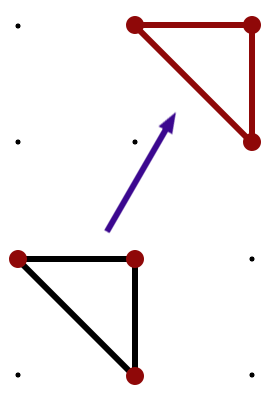

Here, you should build a translation matrix and apply translation by $(20, 25)$ to the vector. Start from explaining how to construct a translation matrix:

*(Your answer goes here)*

Then, implement a function that produces such a matrix:

In [13]:
##### YOUR CODE STARTS #####
def get_translation_matrix(translation_factor_x, translation_factor_y):
  return ...

M4 = ...
##### YOUR CODE ENDS #####
print("Translation matrix is")
print(M4)

Translation matrix is
Ellipsis


TypeError: 'ellipsis' object is not subscriptable

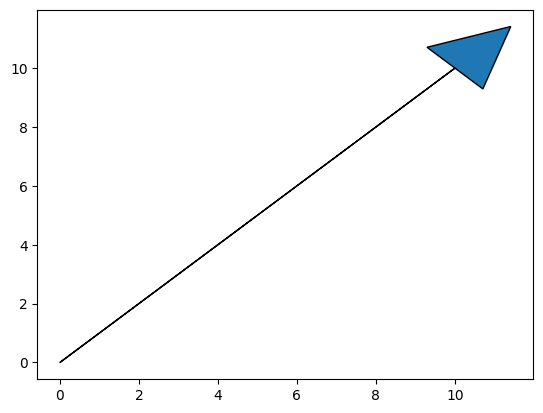

In [14]:
# Apply translation to the vector A1B1 to achieve vector A2B2

##### YOUR CODE STARTS #####
A1 = np.array([0, 0])
B1 = np.array([10, 10])
A2 = ...
B2 = ...
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A1[0], A1[1], B1[0], B1[1], head_width=2, head_length=2)
ax.arrow(A2[0], A2[1], B2[0]-A2[0], B2[1]-A2[1], head_width=2, head_length=2, color='green')
plt.ylim(0,50)
plt.xlim(0,50)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply the translation to the image (translated by (20, 25) before) to restore **sheep.png**.






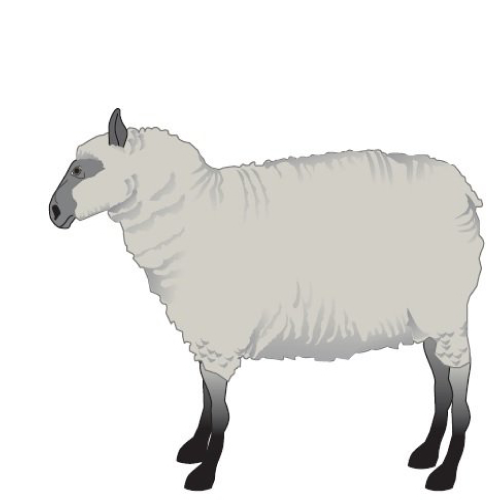

In [ ]:
translated_img = cv.imread("./translated_sheep.png")
cv2_imshow(translated_img)

In [ ]:
##### YOUR CODE STARTS #####
restored_img = ...
##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

### 1.5 Rotation matrix

Rotation is a linear transformation of some space that preserves at least one point. An example of rotation by angle $\psi$ on xy-plane is depicted on the image below:   
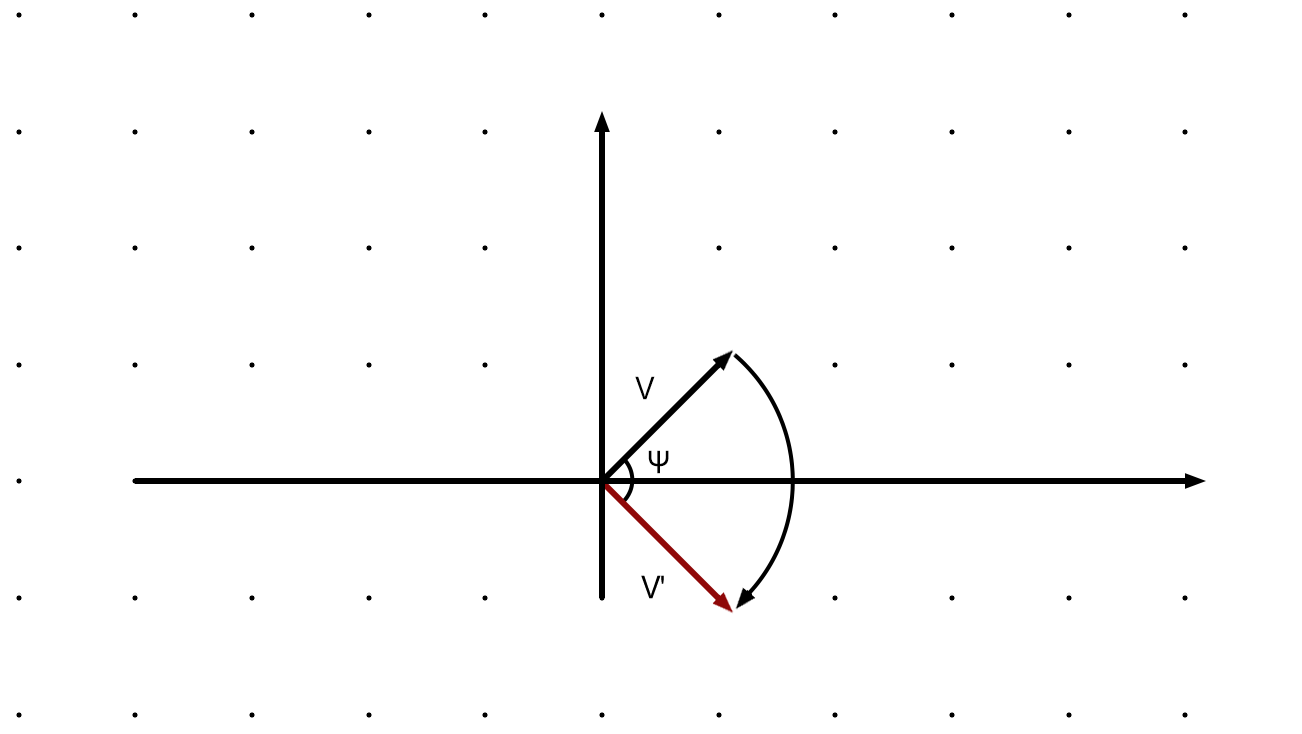

Derive the transformation matrix that corresponds to rotation by a generic angle $\phi$?

*(Your answer is here)*

Your next task is to implement a function that calculates the rotation matrix and apply it to a vector to rotate it by $45^\circ$.
First, construct the rotation matrix:

In [ ]:
# Create rotation matrix

def get_rotation_matrix(phi):
  ##### YOUR CODE STARTS #####
  ...
  ##### YOUR CODE ENDS #####
  return transformation_matrix

phi = 45
M = get_rotation_matrix(phi)
print("Rotation matrix is")
print(M)

Second, we'll apply the transformation to a vector. Let's check what our vector looks like now:


In [ ]:
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [ ]:
# Apply rotation to the vector AB1 to get vector AB2

##### YOUR CODE STARTS #####
A = ...
B1 = np.array([1.5, 1.5])
B2 = ...
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

You can also rotate images! There is image rotated by 45 degrees. Rotate it back with transformation matrix, so it will look like **sheep.png**:

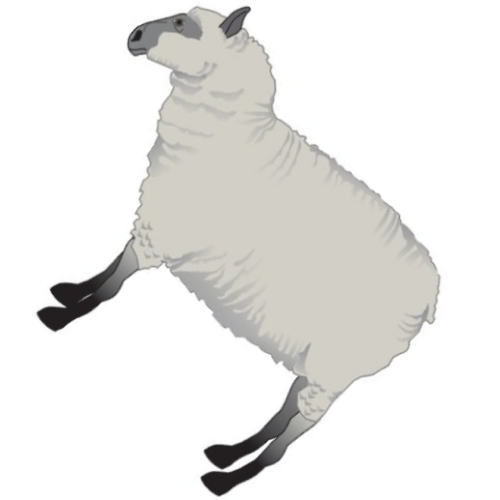

In [ ]:
rotated_img = cv.imread("./rotated_sheep.png")
cv2_imshow(rotated_img)

In [ ]:
##### YOUR CODE STARTS #####
restored_img = cv.warpAffine(..., ..., (500, 500),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
##### YOUR CODE ENDS #####

cv2_imshow(restored_img)

### 1.6 Mirror symmetry
Vertical mirror symmetry maps coordinates $(x, y)$ to $(-x,y)$.

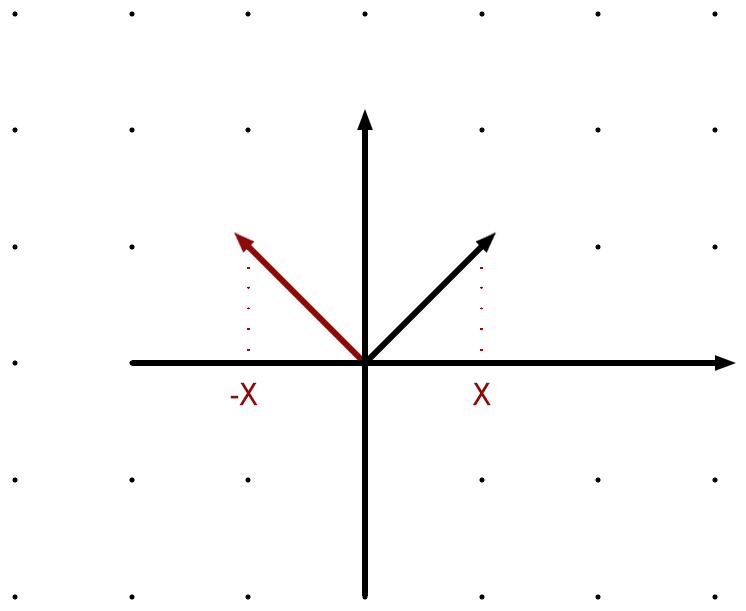

As in the previous parts, you need to provide the expanltion, implement a function that produces a vertical symmetry matrix, and apply it to the vector and to the image.

*(Your answer goes here)*

In [ ]:
##### YOUR CODE STARTS #####
def get_vertical_mirror_marix():
  return ...

M5 = ...
##### YOUR CODE ENDS #####
print("Mirroring matrix is")
print(M5)

In [ ]:
# Apply mirroring to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = ...
B1 = np.array([1, 1])
B2 = ...
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Apply a vertical symmetry matrix to restore **sheep.png**.

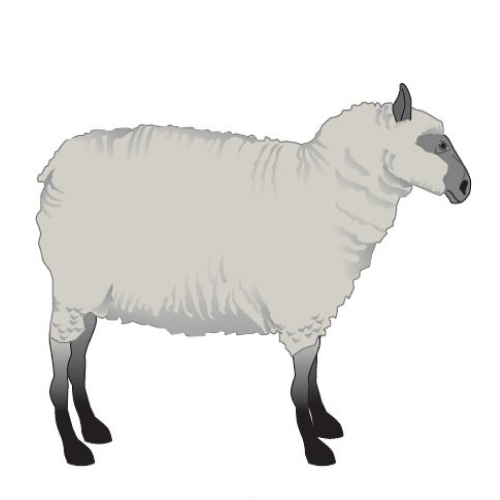

In [ ]:
mirrored_img = cv.imread("./mirrored_sheep.png")
cv2_imshow(mirrored_img)

In [ ]:
##### YOUR CODE STARTS #####
restored_img = ...
##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

## 2.

### 2.1 Perspective shift (homography) matrix

You will need to use `img2.jpg` for this task. Load and resize it using the same commands you used for preparing img1.

The main goal of perspective transformation (or perspective rectification) is to synthesize a perspective-free view of an object given a photo taken at an angle.   

❗️We recommend reading more here: https://docs.opencv.org/4.x/d9/dab/tutorial_homography.html.

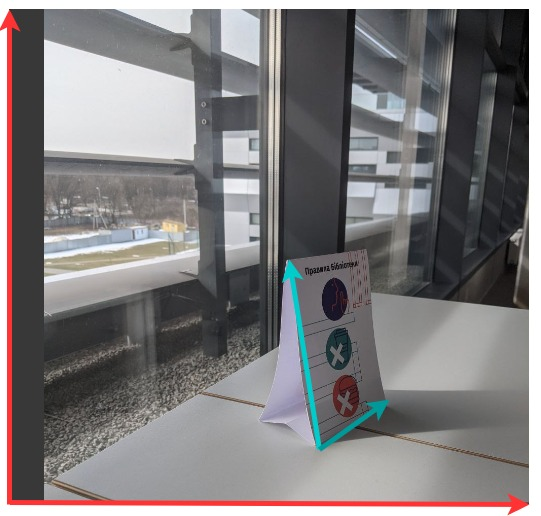

As you see on the picture above, the initial picture has a standard basis of red vectors. We want to transform all of the vectors in the picture so that the blue vectors will become the new basis.

To find this transformation matrix, you need to choose 4 points on the input image and corresponding points on the output image ($3$ of these points should not be collinear). Simply saying, you can choose these points using, for example, Paint.

Our goal is to find a transformation that maps each of our initial 4 points $(x_i,y_i)$ to 4 points with new coordinates $(u_i, v_i)$.

In this case, the transformation matrix is a $3 \times 3$ matrix that satisfies the following equation, where ($x_i$, $y_i$) is the source vector and ($u_i$, $v_i$) is  the destination vector:

$$
\begin{bmatrix} 
u_i \\ 
v_i \\ 
1 
\end{bmatrix} =
\begin{bmatrix} 
c_{00} & c_{01} & c_{02} \\ 
c_{10} & c_{11} & c_{12} \\ 
c_{20} & c_{21} & c_{22} 
\end{bmatrix}
\begin{bmatrix} 
x_i \\ 
y_i \\ 
1 
\end{bmatrix}
$$



Slightly rewriting the equation we can move to:

$$ u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c_{22}} $$

$$ v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}} $$

where $\textcolor{red}{(u_i, v_i)}$ is the coordinates of the destination points and $\textcolor{blue}{(x_i, y_i)}$ is coodinates of the sourse points. In our case sourse points are that on the paper(blue vector) and destination is just corners of the photo (red vectors).


Find coefficients $c_{ij}$ via solving the linear system containing source and destination coordinates and nine $c$ coefficients with numpy methods and apply it to an image so that the sign is clearly visible.

(Hint: $c_{22}$ can be taken as any number; for example, $c_{22} = 1$; the reason is that the matrix we are looking for has $8$ degrees of freedom as it is estimated up to a constant)

First, start from explaining how to move from the equations for $u_i$ and $v_i$ to a system of linear equations of the form $A\mathbf{x} = \mathbf{b}$.

*(Your answer goes here)*

Next, prepare the second image:

In [ ]:
##### YOUR CODE STARTS #####
img2_path = ...
##### YOUR CODE ENDS #####
image2 = cv.imread(img2_path)
cv2_imshow(image2)

Implement the function that constructs a perspective shift matrix and apply it to the image.

In [ ]:
##### YOUR CODE STARTS #####
def get_perspective_transform_matrix(source, destination):
  ...
  return ...

rows,cols,ch = image2.shape

source_points = np.float32([...])
destination_points = np.float32([...])

perspective_shift_m = get_perspective_transform_matrix(source_points, destination_points)

transformed = cv.warpPerspective(...)
cv2_imshow(transformed)
##### YOUR CODE ENDS #####

Compare your result with one obtained with the built-in `getPerspectiveTransform()` opencv funtion.

In [ ]:
##### YOUR CODE STARTS #####
...
##### YOUR CODE ENDS #####

### 2.2 Composition of transformations

Apply the following transformations to the original image in the specified order and observe the results displayed side-by-side.

1) Scaling by $(1.5, 2)$, rotation by $18^\circ$ and translation by $(10, 15)$.  
2) Translation by $(10, 15)$, scaling by $(1.5, 2)$, rotation by $18^\circ$.

In [ ]:
print("---------------------------")
print("Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)")
print("---------------------------")

##### YOUR CODE STARTS #####

##### YOUR CODE ENDS #####

print("---------------------------")
print("Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘")
print("---------------------------")

##### YOUR CODE STARTS #####

##### YOUR CODE ENDS #####

Do the outputs coincide? Is it possible to obtain same/different result changing the order of transformations? Which conditions should be met? Derive it theoretically.

*(Your answer goes here)*

## 3. Image impainting (1 bonus point!)

In [27]:
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

It is a widely used technique in Computer Vision that involves filling in missing or corrupted parts of an image in a visually plausible way.
Today, we will explore a simple approach to solving this problem using **grayscale images** for easier mathematical representation.  

In NumPy, a **grayscale image** is represented as a **2D matrix**, where each element corresponds to the intensity of a pixel $I_{gray} \in \mathbb{R}^{H \times W}$,where $H$ and $W$ are the image height and width, respectively.

```python
gray_image = np.array([
    [0, 128, 255],
    [64, 192, 255],
    [32, 160, 240]
])
```

In contrast, a **color image (RGB)** is a **3D matrix**, where each pixel has three intensity values corresponding to the Red, Green, and Blue channels $
I_{color} \in \mathbb{R}^{H \times W \times 3}$

```python
color_image = np.array([
    [[0, 0, 0], [128, 128, 128], [255, 255, 255]],
    [[64, 64, 64], [192, 192, 192], [255, 255, 255]],
    [[32, 32, 32], [160, 160, 160], [240, 240, 240]]
])
```

By working with grayscale images, we reduce the problem to single-channel interpolation, making it easier to comprehend at the beginning)))  

One of the simplest image inpainting methods for small missing areas is **neighbor averaging**, where a missing pixel is restored by computing the average value of its known neighboring pixels.

For a missing pixel $I(x, y)$, its value can be estimated as:

$$
I(x, y) = \frac{1}{|𝒩(x, y)|} \sum_{(i,j) \in 𝒩(x, y)} I(i, j)
$$

where:  
- $𝒩(x, y)$ is the set of known neighboring pixels around $(x, y)$  
- $|𝒩(x, y)|$ is the number of valid neighbors  
- $I(i, j)$ is the intensity value of a neighboring pixel

---

The set of known neighboring pixels $𝒩(x, y)$ depends on:
* whether we consider 4-connectivity (direct neighbors only):
$$
𝒩_{4}(x, y) = \{ I(x-1, y), I(x+1, y), I(x, y-1), I(x, y+1) \}
$$

* or 8-connectivity (including diagonal neighbors):
$$
𝒩_{8}(x, y) = \{ I(x-1, y-1), I(x-1, y), I(x-1, y+1), I(x, y-1), I(x, y+1), I(x+1, y-1), I(x+1, y), I(x+1, y+1) \}
$$

---

In a **3×3 grid**, the missing pixel at $(1,1)$ is restored using its **top, bottom, left, and right** neighbors:
$$
I(1,1) = \frac{I(0,1) + I(1,0) + I(1,2) + I(2,1)}{4}
$$

With **all 8 neighbors (including those on the angles)**, the missing pixel is estimated as:

$$
I(1,1) = \frac{I(0,0) + I(0,1) + I(0,2) + I(1,0) + I(1,2) + I(2,0) + I(2,1) + I(2,2)}{8}
$$


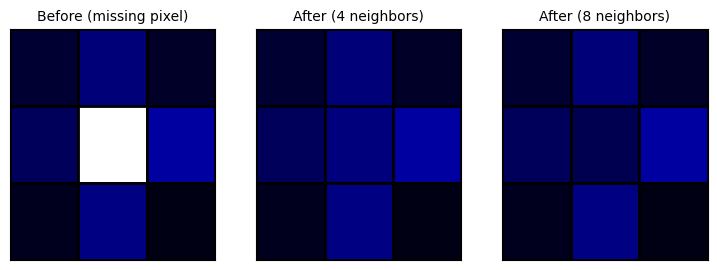

In [28]:
# 3x3 image with a missing center pixel
original_image = np.array([
    [50, 120, 40],
    [90, None, 160],
    [30, 130, 20]
], dtype=object)

# Restore using only direct (4) neighbors
direct_neighbors = [original_image[i, j] for i, j in [(0,1), (1,0), (1,2), (2,1)] if original_image[i, j] is not None]
restored_image_4 = original_image.copy()
restored_image_4[1, 1] = int(np.mean(direct_neighbors))

# Restore using all (8) neighbors
all_neighbors = [original_image[i, j] for i in range(3) for j in range(3) if original_image[i, j] is not None]
restored_image_8 = original_image.copy()
restored_image_8[1, 1] = int(np.mean(all_neighbors))

def plot_image(image, title, ax):
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize=10)

    for i in range(3):
        for j in range(3):
            value = image[i, j]
            color = (0, 0, value / 255) if value is not None else (1, 1, 1)  # white for missing pixel
            rect = patches.Rectangle((j, 2 - i), 1, 1, facecolor=color, edgecolor='black', linewidth=2)
            ax.add_patch(rect)

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
plot_image(original_image, "Before (missing pixel)", axs[0])
plot_image(restored_image_4, "After (4 neighbors)", axs[1])
plot_image(restored_image_8, "After (8 neighbors)", axs[2])
plt.show()


**But what if multiple pixels are missing?**  

When multiple adjacent pixels are missing, we can no longer use simple **neighbor averaging** because some missing pixels depend on others that are also unknown. Instead, we need to set up a **system of linear equations**, where each missing pixel is expressed in terms of its known neighbors and other missing pixels.  


### **Task 1**

Let's consider a simple case where we have a **2×2 missing block** inside a larger image. Your task is to write the system of equations in the form and solve for the missing pixel values.

---

We have a 5×5 grayscale image with the center 2×2 pixels are missing:

$$
\begin{bmatrix}
100 & 120 & 130 & 140 & 150 \\
110 & \mathbf{?} & \mathbf{?} & 145 & 155 \\
115 & \mathbf{?} & \mathbf{?} & 150 & 160 \\
120 & 135 & 140 & 155 & 165 \\
125 & 140 & 145 & 160 & 170
\end{bmatrix}
$$

We can assign variables to the missing pixels $
X_1 = I(1,1), \quad X_2 = I(1,2), \quad X_3 = I(2,1), \quad X_4 = I(2,2)$. Each missing pixel is estimated as the average of its neighbors.

---
1. Write the system of equations for the four unknowns $X_1, X_2, X_3, X_4$ using the given pixel values.
2. Construct the matrix equation $A X = B$, where $A$ is the coefficient matrix, $X$ is the vector of unknowns, $B$ is the vector of known values.
3. Solve for $X$ using `NumPy linalg solver`.

To help, here are the (4) neighbors of each missing pixel:

- $X_1$ (Row 1, Col 1): uses 110, 115, X_2, X_3
- $X_2$ (Row 1, Col 2): uses 130, 145, X_1, X_4
- $X_3$ (Row 2, Col 1): uses 115, 135, X_1, X_4
- $X_4$ (Row 2, Col 2): uses 150, 140, X_2, X_3


**Your theoretical formulation of the system of equations:**

---

The four unknown pixels are labeled as 
\begin{aligned}
X_1 = I(1,1), 
X_2 = I(1,2),
X_3 = I(2,1),
X_4 = I(2,2).
\end{aligned}
Each unknown is given by the average of its 4 neighbors (two known pixel values plus two unknowns). From the description above:

\begin{aligned}
&X_1 \text{ (row 1, col 1) has neighbors } 110,\,115,\,X_2,\,X_3, \\
&X_2 \text{ (row 1, col 2) has neighbors } 130,\,145,\,X_1,\,X_4, \\
&X_3 \text{ (row 2, col 1) has neighbors } 115,\,135,\,X_1,\,X_4, \\
&X_4 \text{ (row 2, col 2) has neighbors } 150,\,140,\,X_2,\,X_3.
\end{aligned}

So, the "average" equations are:

\begin{aligned}
X_1 &= \frac{110 + 115 + X_2 + X_3}{4}, \\
X_2 &= \frac{130 + 145 + X_1 + X_4}{4}, \\
X_3 &= \frac{115 + 135 + X_1 + X_4}{4}, \\
X_4 &= \frac{150 + 140 + X_2 + X_3}{4}.
\end{aligned}

Converting each to standard linear form $A\,X = B$:

\begin{aligned}
4X_1 \;-\; X_2 \;-\; X_3 &= 110 + 115 \;=\; 225, \\
-X_1 \;+\; 4X_2 \;-\; X_4 &= 130 + 145 \;=\; 275, \\
-X_1 \;+\; 4X_3 \;-\; X_4 &= 115 + 135 \;=\; 250, \\
\qquad\; -\,X_2 \;-\; X_3 \;+\; 4X_4 &= 150 + 140 \;=\; 290.
\end{aligned}

In matrix form,
A =
$$
\begin{bmatrix}
 4 & -1 & -1 &  0 \\
-1 &  4 &  0 & -1 \\
-1 &  0 &  4 & -1 \\
 0 & -1 & -1 &  4
\end{bmatrix},
$$

Solving $A X = B$ (with numpy.linalg.solve) yields:

In [29]:
### YOUR CODE SOLUTION START

A = np.array([
    [ 4, -1, -1,  0],
    [-1,  4,  0, -1],
    [-1,  0,  4, -1],
    [ 0, -1, -1,  4]
])

B = np.array([225, 275, 250, 290])

### YOUR CODE SOLUTION END

X = np.linalg.solve(A, B)
assert np.allclose(X, np.array([121.45833333, 133.54166667, 127.29166667, 137.70833333]), atol=1e-6), "Assertion failed: Computed values do not match expected values"

### **Task 2**

Implement an actual image inpainting algorithm that reconstructs missing pixel values using a linear system approach. Compare results with manual implementation of Gaussian elimination and NumPy solver.

Functions you need to implement:
- `construct_linear_system(pixel_matrix, damaged_coords)`  
- `solve_linear_system(A, b, method='numpy')`

Helper functions (already provided):
- `to_grayscale(img)`
- `get_pixel_matrix(img)`
- `set_pixel_matrix(img, pixel_matrix)`
- `create_damaged_matrix(pixel_matrix, num_blocks=5, block_size=20)`
- `complete_solution(img_gray, damaged_matrix, damaged_coords, method='numpy')`

Parameters `num_blocks` and `block_size` can be changed and customized to your preference (but we do not recommend choosing large values due to the probability of long computations).

An example of a potential result:

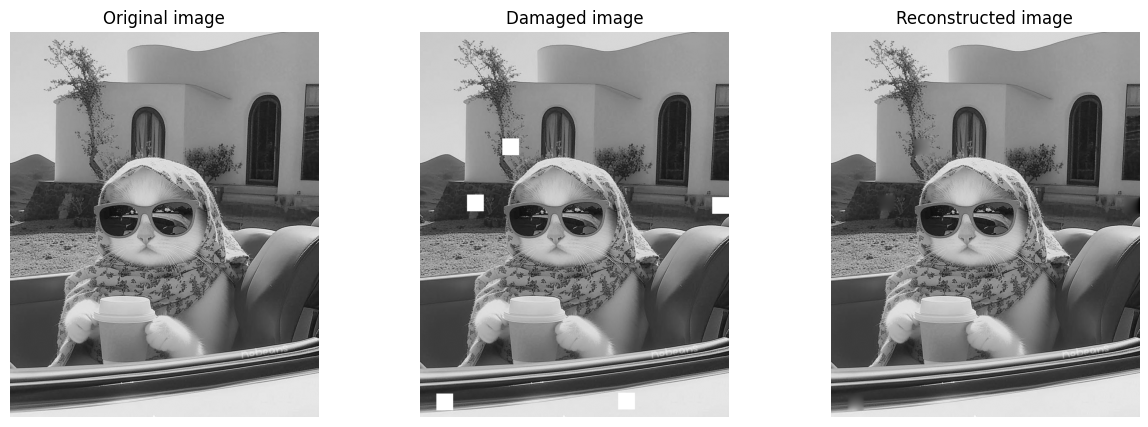

In [18]:
# Convert an image to grayscale
def to_grayscale(img):
    return img.convert("L")

# Get the pixel intensity matrix
def get_pixel_matrix(img):
    width, height = img.size
    return [[img.getpixel((x, y)) for x in range(width)] for y in range(height)]

# Set pixel values from a matrix back to an image
def set_pixel_matrix(img, pixel_matrix):
    width, height = img.size
    for y in range(height):
        for x in range(width):
            img.putpixel((x, y), int(pixel_matrix[y][x]))
    return img

# Generate damaged regions in an image
def create_damaged_matrix(pixel_matrix, num_blocks=5, block_size=20):
    height, width = len(pixel_matrix), len(pixel_matrix[0])
    damaged_coords = []
    damaged_matrix = [row[:] for row in pixel_matrix]

    for _ in range(num_blocks):
        rand_x = random.randint(0, width - block_size)
        rand_y = random.randint(0, height - block_size)
        for y in range(rand_y, rand_y + block_size):
            for x in range(rand_x, rand_x + block_size):
                damaged_coords.append((y, x))
                damaged_matrix[y][x] = 0

    return damaged_matrix, damaged_coords

**Task 2.1**

In [30]:
# Construct the linear system Ax = B for missing pixels
def construct_linear_system(pixel_matrix, damaged_coords):
    """
    Explanations:
    - This function constructs a linear system where each missing pixel is represented by an equation.
    - Each missing pixel is expressed as the average of its valid neighboring pixels.
    - The mapping 'var_index' assigns a unique index to each missing pixel, allowing it to be referenced in matrix form.

    Example:
    var_index = {
        (2, 3): 0, # first missing pixel -> X_0
        (3, 4): 1, # second missing pixel -> X_1
        (5, 2): 2  # third missing pixel -> X_2
    }

    Returns:
    - A (list of lists): Coefficient matrix representing the system of equations.
    - b (list): Right-hand side vector containing known pixel values.
    """
    height, width = len(pixel_matrix), len(pixel_matrix[0])
    var_index = {coord: i for i, coord in enumerate(damaged_coords)}
    n = len(damaged_coords)
    A = [[0] * n for _ in range(n)]
    b = [0] * n

    ### YOUR CODE SOLUTION START
    neighbors_4 = [(-1,0), (1,0), (0,-1), (0,1)]
    for (r, c) in damaged_coords:
        i = var_index[(r, c)]
        valid_neighbors = []
        for dr, dc in neighbors_4:
            nr, nc = r + dr, c + dc
            if 0 <= nr < height and 0 <= nc < width:
                valid_neighbors.append((nr, nc))
        num_neigh = len(valid_neighbors)
        A[i][i] = num_neigh
        sum_known = 0
        for (nr, nc) in valid_neighbors:
            neighbor_val = pixel_matrix[nr][nc]
            if (nr,nc) in var_index:
                j = var_index[(nr,nc)]
                A[i][j] -= 1
            else:
                sum_known += neighbor_val
        b[i] = sum_known

    ### YOUR CODE SOLUTION END

    return A, b

**Task 2.2**

In [31]:
# Solve the linear system using Gaussian elimination or NumPy
def solve_linear_system(A, b, method='numpy'):
    """
    Solves the linear system Ax = B.

    Parameters:
    - A (list of lists): Coefficient matrix.
    - b (list): Right-hand side vector.
    - method (str): 'numpy' to use NumPy solver, 'gaussian' to use manual Gaussian elimination.

    Returns:
    - x (list): Solution vector containing the restored pixel values.
    """
    if method == 'numpy':
        return np.linalg.solve(A, b)
    else:
        n = len(A)
        x = [0] * n

        ### YOUR CODE SOLUTION START
        for i in range(n):
            A[i] = [float(val) for val in A[i]]
        b = [float(val) for val in b]

        for k in range(n):
            pivot_row = max(range(k, n), key=lambda i: abs(A[i][k]))
            if pivot_row != k:
                A[k], A[pivot_row] = A[pivot_row], A[k]
                b[k], b[pivot_row] = b[pivot_row], b[k]
            pivot = A[k][k]
            if abs(pivot) < 1e-12:
                raise ValueError("Matrix is (near) singular, pivot too small.")

            for i in range(k+1, n):
                factor = A[i][k] / pivot
                for j in range(k, n):
                    A[i][j] -= factor * A[k][j]
                b[i] -= factor * b[k]

        for i in range(n-1, -1, -1):
            sum_ax = 0.0
            for j in range(i+1, n):
                sum_ax += A[i][j] * x[j]
            if abs(A[i][i]) < 1e-12:
                raise ValueError("Matrix is (near) singular during back-substitution.")
            x[i] = (b[i] - sum_ax) / A[i][i]

        ### YOUR CODE SOLUTION END

        return x

In [32]:
def complete_solution(img_gray, damaged_matrix, damaged_coords, method='numpy'):
  try:
      solution = solve_linear_system(A, b, method)
  except ValueError as e:
      print("Error solving the system:", e)
      solution = None

  # Apply the reconstructed pixel values
  if solution is not None:
      restored_matrix = [row[:] for row in damaged_matrix]
      for i, (y, x) in enumerate(damaged_coords):
          restored_matrix[y][x] = int(solution[i])

      # Create visualization
      restored_img = set_pixel_matrix(img_gray.copy(), restored_matrix)
      damaged_img = set_pixel_matrix(img_gray.copy(), damaged_matrix)
      highlighted_matrix = [row[:] for row in damaged_matrix]
      for (y, x) in damaged_coords:
          highlighted_matrix[y][x] = 255
      highlighted_img = set_pixel_matrix(img_gray.copy(), highlighted_matrix)

      # Display results
      fig, axs = plt.subplots(1, 3, figsize=(15, 5))
      axs[0].imshow(img_gray, cmap='gray')
      axs[0].set_title("Original Image")
      axs[1].imshow(highlighted_img, cmap='gray')
      axs[1].set_title("Damaged Image")
      axs[2].imshow(restored_img, cmap='gray')
      axs[2].set_title("Reconstructed Image")

      for ax in axs:
          ax.axis("off")

      plt.show()

**Example of use**

In [33]:
# Load and preprocess the image
img = Image.open("/img2.jpg")
img_gray = to_grayscale(img)
pixel_matrix = get_pixel_matrix(img_gray)

# Create damaged image
num_blocks=5 # number of damages
block_size=20 # pixel size of damages
height, width = len(pixel_matrix), len(pixel_matrix[0])
damaged_matrix, damaged_coords = create_damaged_matrix(pixel_matrix, num_blocks, block_size)

# Construct the linear system
A, b = construct_linear_system(pixel_matrix, damaged_coords)

# Solve and visualize
complete_solution(img_gray, damaged_matrix, damaged_coords)
complete_solution(img_gray, damaged_matrix, damaged_coords, method='manual')

FileNotFoundError: [Errno 2] No such file or directory: '/img2.jpg'

**Your thoughts and conclusions:**

---

Each missing pixel is constrained to be the average of its neighbors, leading to a system of linear equations $A X = B$. Solving for $X$ gave the pixel values that smoothly interpolate from the surrounding known pixels. This approach worked well for small missing regions, and it was a good demonstration of combining Computer Vision with fundamental Linear Algebra techniques.

---

**Additional questions:**
1. What other methods do you know to solve a system of linear equations?
2. What happens if the damaged pixels are located at the edges of the image? How will this affect the equation?
3. How will the problem change if we take diagonal neighbors into account when calculating the average?
4. Why does the algorithm work well for small damage but is ineffective for large areas?
5. How would you improve the approach to repair more complex damage (e.g., entire missing objects)?


---

1. Beyond simple Gaussian Elimination, there is LU Decomposition...
2. At an edge, each pixel may have fewer neighbors (for example, a corner has only two direct neighbors in 4‐connectivity). In equations, that simply means each missing pixel's "average" is over however many valid neighbors actually exist. So the coefficient in front of $X_i$
(the pixel’s own variable) might be smaller or the same (the system is still solvable), but we must take care that we only include valid neighbors within image bounds.
3. Instead of 4‐connectivity, we would have 8‐connectivity. Each missing pixel could have up to 8 neighbors (including diagonals). Then the “average” equation would become $X_i=\frac{\sum_{\text {all 8 neighbors }} I(\ldots)}{8}$, and in the linear system, each missing neighbor contributes−1 to the row in A. The effect is that the matrix A and vector B each have slightly different values. Typically this yields a smoother fill that accounts for diagonal continuity.
4. Over a large missing region, the result will become blurred or smoothed, since no high‐frequency structure can be recreated just by averaging boundary pixels. One will lose detail or texture inside big holes, so it’s only good for small defects or scratches.
5. We could use more advanced inpainting algorithms:
Texture synthesis or patch‐based methods (e.g. Criminisi algorithm) that copy similar textures from other regions of the image.
PDE‐based inpainting methods that propagate isophotes or contours inward.
Deep‐learning‐based inpainting which can hallucinate plausible content in large missing areas by training on large datasets of images.
These approaches can reconstruct more detailed texture or objects rather than simply smoothing.

---

**You can explore more advanced approaches with the same core idea:**
- [On Surface Completion and Image Inpainting by Biharmonic Functions](https://onlinelibrary.wiley.com/doi/10.1155/2018/3950312)
- [Harmonic Inpainting of the Cosmic Microwave Background Sky: Formulation and Error Estimate](https://arxiv.org/abs/0804.0527)
- [Image Inpainting Method Based on Mixed Median](https://ieeexplore.ieee.org/document/8858556)



## Summary

To summarize everything you have learnt in this lab assignment, answer the questions below.

### How its shape and values affect the resulting image? What is a shape of a typical transformation matrix that is applied to images; which factors affect its shape?

*(Your answer goes here)*

### What can be a result of composition of transformations?

*(Your answer goes here)*

### What is a perspective shift transformation in terms of geometry?

*(Your answer goes here)*